<div style="
    max-width: 1200px;
    margin: 18px auto; 
    padding: 50px 30px; 
    background: rgba(120, 120, 120, 0.05); 
    border-radius: 20px; 
    border: 1px solid rgba(120, 120, 120, 0.1);
    box-shadow: 0 10px 30px rgba(0,0,0,0.15);
    text-align: center;
">
    <h1 style="
        margin: 0; 
        background: linear-gradient(90deg, #6a11cb 0%, #2575fc 100%); 
        -webkit-background-clip: text; 
        -webkit-text-fill-color: transparent; 
        font-family: 'Segoe UI', sans-serif; 
        font-weight: 800; 
        font-size: 3em;
    ">
        Ahmed Gamal Ahmed
    </h1>
    <p style="
        font-size: 1.2em; 
        opacity: 0.8; 
        margin: 15px 0 0 0; 
        font-family: 'Segoe UI', sans-serif; 
        letter-spacing: 1px;
        line-height: 1.8;
    ">
       Track: AI - Intake 46 - Alexandria
       <br/>
       Subject: Supervised Machine Learning Project 
       <br/>
       Project Title: Hand Gestures Classification
    </p>
</div>

<div style="
  width: 97%;
  margin: 12px 0;
  padding: 16px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.08);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.10);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <!-- Left Accent (Theme) -->
  <div style="
    position: absolute;
    left: 0; top: 0; bottom: 0;
    width: 5px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <div style="
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    color: inherit;
  ">
    <p style="
      margin: 0;
      font-size: 1em;
      line-height: 1.75;
      opacity: 0.90;
    ">
      In this project I will classify and gestures using  landmark data generated by MediaPipe from the HaGRID (Hand Gesture Recognition Image Dataset).
    </p>
    <!-- Optional bullets -->
    <ul style="
      margin: 10px 0 0 18px;
      padding: 0;
      line-height: 1.75;
      opacity: 0.88;
    ">
      <li><strong>Input: </strong>CSV file containing hand landmarks (e.g., x, y, z coordinates of 21 keypoints) extracted from the HaGRID dataset using MediaPipe</li>
      <li><strong>Output: a trained machine learning model capable of classifying hand gestures into predefined classes</strong></li>
    </ul>
  </div>
</div>

<div style="
    max-width: 1200px;
    margin: 18px auto;
    padding: 18px 25px;
    background: linear-gradient(90deg, #5e0ab9 0%,#6a11cb 30%, #3f84fd 100%);
    border-radius: 14px;
    box-shadow: 0 8px 25px rgba(0,0,0,0.2);
    text-align: center;
">
    <h2 style="
        color: white;
        margin: 0;
        letter-spacing: 2px;
        font-weight: 700;
        font-family: 'Segoe UI', sans-serif;
    ">
        1. Loading and Exploring Data
    </h2>

</div>

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    1.1 Importing Libraries
  </h3>
</div>

In [1]:
print("Start")

Start


In [98]:
# General Packages
import random
import os
import math

# Data Dealers
import numpy as np
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

    
# Training Helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Evaluation
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report


# Inference
import cv2
from collections import deque, Counter
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


# Loggers
import logging
import joblib
import traceback


# Mlflow
import mlflow_logging as mll

print("All packages were imported successfully!")

All packages were imported successfully!


In [3]:
random.seed(17)
np.random.seed(17)

print("Seed has been set successfully")

Seed has been set successfully


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    1.2 Data Loading
  </h3>
</div>

In [4]:
df = pd.read_csv("hand_landmarks_data.csv")
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    1.3 Data Exploring
  </h3>
</div>

In [5]:
print(f"We have 21 keypoint for the hand")
print("We have x, y, and z coordinates for each keypoint")
print(f"That makes the total number of columns: {21*3}")
print(f"Plus a column for the label and that's total of {21*3 + 1} columns")
print(f"That interprets the {len(df.columns)} columns in the loaded data.")

We have 21 keypoint for the hand
We have x, y, and z coordinates for each keypoint
That makes the total number of columns: 63
Plus a column for the label and that's total of 64 columns
That interprets the 64 columns in the loaded data.


In [6]:
print(f"We have total of {len(df)} rows in the dataset")

We have total of 25675 rows in the dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

All columns are of type float64, and the label is object

Our data his no problems in datatypes

In [8]:
def pretty_get_label_counts(df, print_summary = True):
    '''
    This function gets the label counts of the provided dataframe
    For formatting purposes, it makes the labels titled and replacing the _ with an empty space
    Then it sorts the values from low to high

    params:
    df: pd.DataFrame with the data

    returns:
    label_counts: pd.Series with the sorted prettiest label counts
    '''
    labels_counts = df["label"].value_counts()
    labels_counts.index = labels_counts.index.str.title()
    labels_counts.index = labels_counts.index.str.replace("_"," ")

    labels_counts = labels_counts.sort_values(ascending=True)
    
    if print_summary:
        print(f"We have a total of {len(df["label"].value_counts())} classes")
        print("Here are the classes and their counts:")
        print(labels_counts.sort_index())

    return labels_counts

In [9]:
labels_counts = pretty_get_label_counts(df)

We have a total of 18 classes
Here are the classes and their counts:
label
Call               1506
Dislike            1295
Fist                945
Four               1634
Like               1436
Mute               1087
Ok                 1592
One                1263
Palm               1649
Peace              1441
Peace Inverted     1497
Rock               1458
Stop               1482
Stop Inverted      1567
Three              1456
Three2             1653
Two Up             1343
Two Up Inverted    1371
Name: count, dtype: int64


No inconsistencies in the label column

In [10]:
print(f"Number of missing values in the dataset is: {int(df.isnull().sum().any())}")

Number of missing values in the dataset is: 0


No missing values in the data

In [11]:
print(f"Number of duplicates in the dataset is: {int(df.duplicated().any())}")

Number of duplicates in the dataset is: 0


No duplicates in the data

<div style="display: flex; 
            width: 97%;
            align-items: center; 
            padding: 15px; 
            background: rgba(37, 117, 252, 0.2); 
            border: 1px dashed rgba(255, 193, 7, 0.5); 
            border-radius: 10px; 
            margin: 12px 0;">
    <div>
        <b style="color: #3f84fd; font-size: 1.1em;">Data Exploration Insights:</b>
        <span style="opacity: 0.9;">
            Data is clean without any inconsistencies, missing values, or duplicates. Proceeding with Data Visualization Phase
        </span>
    </div>
</div>

<div style="
    max-width: 1200px;
    margin: 18px auto;
    padding: 18px 25px;
    background: linear-gradient(90deg, #5e0ab9 0%,#6a11cb 30%, #3f84fd 100%);
    border-radius: 14px;
    box-shadow: 0 8px 25px rgba(0,0,0,0.2);
    text-align: center;
">
    <h2 style="
        color: white;
        margin: 0;
        letter-spacing: 2px;
        font-weight: 700;
        font-family: 'Segoe UI', sans-serif;
    ">
        2. Data Visualization
    </h2>

</div>

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    2.1 Class Distributions
  </h3>
</div>

In [12]:
def plot_class_distribution(df, title="Class Distribution"):
    '''
    This function gets the number of instances inside each class in the provided df using pretty_get_label_counts(df) function
    Then it plots the distribution in a horizontal bar plot

    params:
    df: pd.DataFrame representing the data
    '''
    labels_counts = pretty_get_label_counts(df, print_summary=False)
    
    fig = px.bar(
        x=labels_counts.values,
        y=labels_counts.index,
        orientation='h',
        text=labels_counts.values,
        color=labels_counts.values,
        title=title,
        color_continuous_scale="Purpor",
    )

    fig.update_layout(
        xaxis_title="Number of Samples",
        yaxis_title="Gesture Class",
        height=650,
        coloraxis_showscale=False
    )

    fig.show()

In [13]:
plot_class_distribution(df)

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    2.2 Visualizing Samples
  </h3>
</div>

In [14]:
def visualize_random_sample(df):
    idx = random.randint(0, len(df) - 1)
    row = df.iloc[idx]
    label = row["label"]

    xs = np.array([row[f"x{i}"] for i in range(1, 22)], dtype=float)
    ys = -np.array([row[f"y{i}"] for i in range(1, 22)], dtype=float)  # flip y
    zs = np.array([row[f"z{i}"] for i in range(1, 22)], dtype=float)
    z_norm = (zs - zs.min()) / (np.ptp(zs) + 1e-9)

    connections = [
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(6,7),(7,8),
        (0,9),(9,10),(10,11),(11,12),
        (0,13),(13,14),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20),
        (5,9),(9,13),(13,17),
    ]

    traces = []

    # Skeleton lines — glow + core
    for i, j in connections:
        for width, opacity in [(10, 0.06), (2, 0.75)]:
            traces.append(go.Scatter(
                x=[xs[i], xs[j]], y=[ys[i], ys[j]],
                mode="lines",
                line=dict(color="#1a6aff", width=width),
                opacity=opacity,
                showlegend=False, hoverinfo="skip",
            ))

    # Glow halos
    traces.append(go.Scatter(
        x=xs, y=ys, mode="markers", hoverinfo="skip", showlegend=False,
        marker=dict(size=[14 + z_norm[k]*14 for k in range(21)],
                    color="#00c8ff", opacity=0.12, line=dict(width=0)),
    ))

    # Core nodes with hover
    node_names = [
        "Wrist","Thumb CMC","Thumb MCP","Thumb IP","Thumb Tip",
        "Index MCP","Index PIP","Index DIP","Index Tip",
        "Middle MCP","Middle PIP","Middle DIP","Middle Tip",
        "Ring MCP","Ring PIP","Ring DIP","Ring Tip",
        "Pinky MCP","Pinky PIP","Pinky DIP","Pinky Tip",
    ]
    traces.append(go.Scatter(
        x=xs, y=ys, mode="markers+text",
        marker=dict(size=8, color=z_norm,
                    colorscale=[[0,"#1a6aff"],[0.5,"#00c8ff"],[1,"#00ffcc"]],
                    line=dict(color="white", width=1), opacity=0.95),
        text=[str(k+1) for k in range(21)],
        textposition="top center",
        textfont=dict(size=9, color="#00ffcc", family="monospace"),
        hovertext=[f"<b>#{k+1} {node_names[k]}</b><br>x:{xs[k]:.1f} y:{ys[k]:.1f} z:{zs[k]:.5f}" for k in range(21)],
        hovertemplate="%{hovertext}<extra></extra>",
        name="Keypoints",
    ))

    BG = "#050d1a"
    fig = go.Figure(traces, layout=go.Layout(
        height=400,
        width=800,
        title=dict(
            text=(f"<span style='font-family:monospace;color:#00ffcc;font-size:15px'>◈  Random Sample 2D</span><br>"
                  f"<span style='font-family:monospace;color:#4a8aaa;font-size:10px'>GESTURE CLASSIFICATION  ·  SAMPLE {idx}  ·  "
                  f"<span style='color:#00ffcc'>▶ {str(label).upper()}</span></span>"),
            x=0.5, xanchor="center",
        ),
        paper_bgcolor=BG, plot_bgcolor=BG,
        xaxis=dict(showgrid=True, gridcolor="#0a2040", gridwidth=1, zeroline=False,
                   tickfont=dict(color="#1a4060", size=8, family="monospace"),
                   showline=True, linecolor="#0a2040"),
        yaxis=dict(showgrid=True, gridcolor="#0a2040", gridwidth=1, zeroline=False,
                   tickfont=dict(color="#1a4060", size=8, family="monospace"),
                   showline=True, linecolor="#0a2040", scaleanchor="x"),
        hoverlabel=dict(bgcolor="#001a35", bordercolor="#00ffcc",
                        font=dict(color="#cce8ff", size=11, family="monospace")),
        margin=dict(l=40, r=40, t=90, b=40),
        showlegend=False,
    ))
    fig.show()

In [15]:
for i in range(5):
    visualize_random_sample(df)

In [16]:
def visualize_random_sample_3d(df):
    """
    Randomly picks a row from the dataframe and renders an interactive
    3D holographic hand skeleton using Plotly.
    Drag to rotate, scroll to zoom, hover for keypoint details.
    """

    # ── Pick random sample ──────────────────────────────────────────────────
    idx = random.randint(0, len(df) - 1)
    row = df.iloc[idx]
    label = row["label"]

    # ── Parse keypoints ─────────────────────────────────────────────────────
    n_kp = 21
    xs = np.array([row[f"x{i}"] for i in range(1, n_kp + 1)], dtype=float)
    ys = np.array([row[f"y{i}"] for i in range(1, n_kp + 1)], dtype=float)
    zs = np.array([row[f"z{i}"] for i in range(1, n_kp + 1)], dtype=float)

    # Flip y so hand points upward
    ys = -ys

    # Scale z up for visibility (z range is tiny compared to x/y)
    z_scale = (xs.max() - xs.min()) * 0.5
    z_range = np.ptp(zs) + 1e-9
    zs_vis = (zs - zs.mean()) / z_range * z_scale

    # Depth normalised 0→1 for colour mapping
    z_norm = (zs_vis - zs_vis.min()) / (np.ptp(zs_vis) + 1e-9)

    # ── Hand skeleton connections (MediaPipe-style) ──────────────────────────
    finger_connections = {
        "Thumb":   [(0,1),(1,2),(2,3),(3,4)],
        "Index":   [(0,5),(5,6),(6,7),(7,8)],
        "Middle":  [(0,9),(9,10),(10,11),(11,12)],
        "Ring":    [(0,13),(13,14),(14,15),(15,16)],
        "Pinky":   [(0,17),(17,18),(18,19),(19,20)],
        "Palm":    [(5,9),(9,13),(13,17)],
    }

    finger_colors = {
        "Thumb":  "#ff6b6b",
        "Index":  "#00c8ff",
        "Middle": "#00ffcc",
        "Ring":   "#a78bfa",
        "Pinky":  "#fbbf24",
        "Palm":   "#38efff",
    }

    # ── Build traces ─────────────────────────────────────────────────────────
    traces = []

    # Skeleton lines — one trace per finger group for clean legend
    for finger, conns in finger_connections.items():
        color = finger_colors[finger]
        for (i, j) in conns:
            # Glow layer (thick, transparent)
            traces.append(go.Scatter3d(
                x=[xs[i], xs[j]], y=[ys[i], ys[j]], z=[zs_vis[i], zs_vis[j]],
                mode="lines",
                line=dict(color=color, width=12),
                opacity=0.08,
                showlegend=False,
                hoverinfo="skip",
            ))
            # Core line
            traces.append(go.Scatter3d(
                x=[xs[i], xs[j]], y=[ys[i], ys[j]], z=[zs_vis[i], zs_vis[j]],
                mode="lines",
                line=dict(color=color, width=3),
                opacity=0.85,
                name=finger,
                legendgroup=finger,
                showlegend=(conns.index((i, j)) == 0),   # show once per finger
                hoverinfo="skip",
            ))

    # Outer glow spheres
    traces.append(go.Scatter3d(
        x=xs, y=ys, z=zs_vis,
        mode="markers",
        marker=dict(
            size=[10 + z_norm[k] * 10 for k in range(n_kp)],
            color=["rgba(0,200,255,{:.2f})".format(0.08 + z_norm[k] * 0.15) for k in range(n_kp)],
            line=dict(width=0),
        ),
        showlegend=False,
        hoverinfo="skip",
    ))

    # Core nodes with hover info
    node_names = [
        "Wrist",
        "Thumb CMC","Thumb MCP","Thumb IP","Thumb Tip",
        "Index MCP","Index PIP","Index DIP","Index Tip",
        "Middle MCP","Middle PIP","Middle DIP","Middle Tip",
        "Ring MCP","Ring PIP","Ring DIP","Ring Tip",
        "Pinky MCP","Pinky PIP","Pinky DIP","Pinky Tip",
    ]
    hover_texts = [
        f"<b>#{k+1} {node_names[k]}</b><br>"
        f"x: {xs[k]:.2f}<br>y: {ys[k]:.2f}<br>z: {zs[k]:.5f}"
        for k in range(n_kp)
    ]

    traces.append(go.Scatter3d(
        x=xs, y=ys, z=zs_vis,
        mode="markers+text",
        marker=dict(
            size=6,
            color=z_norm,
            colorscale=[[0, "#1a6aff"], [0.5, "#00c8ff"], [1, "#00ffcc"]],
            line=dict(color="white", width=1),
            opacity=0.95,
        ),
        text=[str(k+1) for k in range(n_kp)],
        textposition="top center",
        textfont=dict(size=9, color="#00ffcc", family="monospace"),
        hovertext=hover_texts,
        hovertemplate="%{hovertext}<extra></extra>",
        name="Keypoints",
    ))

    # ── Layout ───────────────────────────────────────────────────────────────
    BG       = "#050d1a"
    GRID_CLR = "rgba(0,100,180,0.2)"
    AXIS_CLR = "rgba(0,150,220,0.4)"

    axis_font = dict(color="#1a6080", size=7, family="monospace")
    axis_style = dict(
        showbackground=True,
        backgroundcolor=BG,
        gridcolor=GRID_CLR,
        gridwidth=1,
        zerolinecolor=AXIS_CLR,
        tickfont=dict(color="#1a4060", size=9, family="monospace"),
        showspikes=True,
        spikecolor="#00c8ff",
        spikethickness=1,
    )

    layout = go.Layout(
        height=400,
        width=800,
        title=dict(
            text=(
                f"<span style='font-family:monospace; color:#00ffcc; font-size:16px'>"
                f"◈  Random Sample 3D</span><br>"
                f"<span style='font-family:monospace; color:#4a8aaa; font-size:11px'>"
                f"GESTURE CLASSIFICATION  ·  SAMPLE INDEX {idx}  ·  "
                f"<span style='color:#00ffcc; font-size:13px'>▶ {str(label).upper()}</span></span>"
            ),
            x=0.5, xanchor="center", y=0.97,
        ),
        paper_bgcolor=BG,
        scene=dict(
            xaxis=dict(**axis_style, title=dict(text="X", font=axis_font)),
            yaxis=dict(**axis_style, title=dict(text="Y (flipped)", font=axis_font)),
            zaxis=dict(**axis_style, title=dict(text="Z (scaled)", font=axis_font)),
            camera=dict(
                eye=dict(x=0.0, y=-0.1, z=2.5),
                up=dict(x=0, y=1, z=0),
                center=dict(x=0, y=0, z=0),
            ),
            aspectmode="cube",
        ),
        legend=dict(
            x=0.01, y=0.95,
            bgcolor="rgba(0,15,35,0.8)",
            bordercolor="#00c8ff",
            borderwidth=1,
            font=dict(color="#cce8ff", size=10, family="monospace"),
        ),
        margin=dict(l=0, r=0, t=100, b=0),
        hoverlabel=dict(
            bgcolor="#001a35",
            bordercolor="#00ffcc",
            font=dict(color="#cce8ff", size=11, family="monospace"),
        ),
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

In [17]:
for i in range(5):
    visualize_random_sample_3d(df)

<div style="
    max-width: 1200px;
    margin: 18px auto;
    padding: 18px 25px;
    background: linear-gradient(90deg, #5e0ab9 0%,#6a11cb 30%, #3f84fd 100%);
    border-radius: 14px;
    box-shadow: 0 8px 25px rgba(0,0,0,0.2);
    text-align: center;
">
    <h2 style="
        color: white;
        margin: 0;
        letter-spacing: 2px;
        font-weight: 700;
        font-family: 'Segoe UI', sans-serif;
    ">
        3. Data Preprocessing
    </h2>

</div>

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    3.1 Making the wrist point as origin
  </h3>
</div>

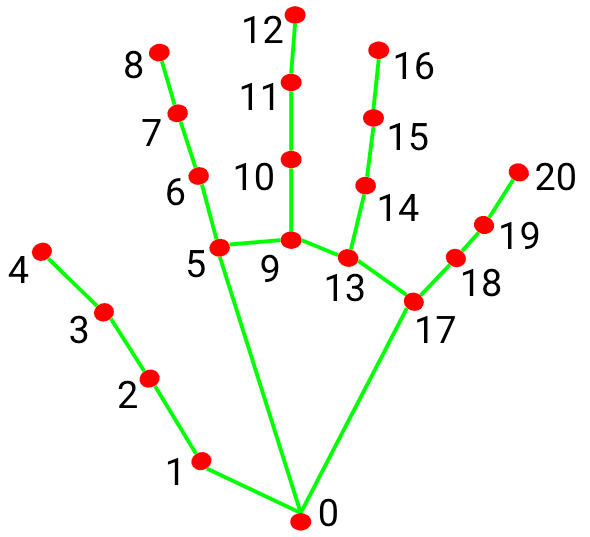

This is the map for landmarks in mediapipe (our data is on 1-based index not 0-based so we will shift all indices by 1 from the image)

We want to make the wrist the origin in all the dataset

To handle shifting, scaling, and rotation of different images

We will do so by subtracting the x and y positions of the wrist from all the other landmarks

In [18]:
def recenter_landmarks(df):
    '''
    This function recenters landmarks by subtracting x,y positions of the wrist from all other landmarks
    This handles shifting, scaling, and rotation differences in the images

    params:
    df: pd_dataframe that has the data

    returns:
    df: pd_dataframe that has the recentered data

    Note: edits are not done inplace
    '''
    df = df.copy()
    wrist_x_col = "x1"
    wrist_y_col = "y1"

    x_cols = [c for c in df.columns if c.startswith("x")]
    y_cols = [c for c in df.columns if c.startswith("y")]

    for i in range(len(x_cols)-1, -1, -1): # I tried to start from 0 to end but that will make the wrist 0 at the start so subtraction will have no effect
        df[x_cols[i]] = df[x_cols[i]] - df[wrist_x_col]
        df[y_cols[i]] = df[y_cols[i]] - df[wrist_y_col]
    
    return df

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    3.2 Overcome scaling problem using mid-finger tip
  </h3>
</div>

Now we want to overcome the scaling problem

Some images have the hand near to the camera and some don't, and this will make differences in the values

We will solve this problem by dividing all the x,y for all landmarks by the mid-finger tip position

But the new problem that will face us is: that we have some values of the mid-finger tip near to 0

Dividing by numbers very near to 0, will lead to exploding some values and that's not recommended

In the next few cells, I examine the values of the mid-finger tip positions after the rescaling

In [19]:
test_df = df.copy()
test_df = recenter_landmarks(test_df)

In [20]:
test_df[(test_df["x13"]>0) & (test_df["x13"]<0.1)]["x13"].sort_values()

17323    0.001511
20923    0.001556
19357    0.002037
19708    0.004829
20412    0.006410
           ...   
22995    0.096142
12517    0.096336
8371     0.099220
11077    0.099770
4788     0.099781
Name: x13, Length: 64, dtype: float64

In [21]:
test_df[(test_df["y13"]>0) & (test_df["y13"]<0.1)]["y13"].sort_values()

1344    0.000702
556     0.006975
358     0.018387
995     0.026764
1697    0.033749
119     0.042023
6608    0.044435
832     0.062119
6095    0.069420
955     0.076202
711     0.080322
159     0.082443
1245    0.085654
6059    0.085693
2254    0.098702
Name: y13, dtype: float64

We will overcome this new problem by dividing by the distance from the mid-finger tip rather than the raw position of it

So we will divide all values by: sqrt(x_midtip² + y_midtip²)

In [22]:
def divide_by_midtip(df):
    '''
    This function handles scaling problem by dividing x,y positions of all landmarks by the distance from mid-finger tip
    The distance is calculated using this formula: sqrt(x_midtip² + y_midtip²)

    params:
    df: pd_dataframe that has the data

    returns:
    df: pd_dataframe that has the scaled data

    Note: edits are not done inplace
    '''
    df = df.copy()
    midtip_x_col = "x13"
    midtip_y_col = "y13"

    x_cols = [c for c in df.columns if c.startswith("x")]
    y_cols = [c for c in df.columns if c.startswith("y")]

    x_cols.remove(midtip_x_col) # Because we want its value to be still untill we finish the division
    y_cols.remove(midtip_y_col)

    distance_to_midtip = np.sqrt(df[midtip_x_col]**2 + df[midtip_y_col]**2)

    for i in range(len(x_cols)):
        df[x_cols[i]] = df[x_cols[i]] / distance_to_midtip
        df[y_cols[i]] = df[y_cols[i]] / distance_to_midtip
    
    df[midtip_x_col] = df[midtip_x_col] / df[midtip_x_col]
    df[midtip_y_col] = df[midtip_y_col] / df[midtip_y_col]
    
    return df

In [23]:
test_df.head(2)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-5.252426,-10.195847,0.004224,-15.787010,-15.588074,0.005798,-26.285431,...,-39.324875,-1.814209,-0.020450,-47.626602,0.809845,-0.024577,-54.663574,2.303772,-0.026722,call
1,0.0,0.0,-2.345265e-07,-1.426741,-17.496765,-0.011102,6.728354,-34.523865,-0.021096,12.290045,...,49.099840,-4.264679,-0.038175,59.421804,-3.229858,-0.037336,69.079920,-3.043121,-0.036136,call


In [24]:
test_df = divide_by_midtip(test_df)
test_df.head(2)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call


In [25]:
test_df["x13"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
25670    1.0
25671    1.0
25672    1.0
25673    1.0
25674    1.0
Name: x13, Length: 25675, dtype: float64

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    3.3 Applying preprocessing pipeline
  </h3>
</div>

In [26]:
def preprocess_data(df):
    '''
    This function represents the preprocessing pipeline
    It recenters the landmarks and do the rescaling step

    params:
    df: pd_dataframe that has the data

    returns:
    df: pd_dataframe that has the recentered scaled data

    Note: edits are not done inplace
    '''
    df = df.copy()
    
    df = recenter_landmarks(df)
    df = divide_by_midtip(df)
    
    return df

In [27]:
df_preprocessed = preprocess_data(df)
df_preprocessed.head(3)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    3.4 Train-Test Split
  </h3>
</div>

I am going to split the preprocessed data to 20% test set and 80% training set

In [28]:
random.seed(17)
np.random.seed(17)

train_set, test_set = train_test_split(df_preprocessed, test_size=0.4, random_state=17, stratify=df_preprocessed["label"])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=17, stratify=test_set["label"])
print("Splitting has been done successfully")

Splitting has been done successfully


In [29]:
print(f"The shape of the train_set is: {train_set.shape}")
print(f"The shape of the val_set is: {val_set.shape}")
print(f"The shape of the test_set is: {test_set.shape}")

The shape of the train_set is: (15405, 64)
The shape of the val_set is: (5135, 64)
The shape of the test_set is: (5135, 64)


In [30]:
train_size = train_set.shape[0]
val_size  = val_set.shape[0]
test_size  = test_set.shape[0]

fig = px.pie(
    labels=["Training Set", "Validation Set", "Testing Set"],
    values=[train_size, val_size, test_size],
    hole=0.4
)

fig.update_traces(
    textinfo="value",
    textfont_size = 16
)

fig.update_layout(
    title={
        "text": "Train-Val-Test Split Distribution (60-20-20)",
        "x": 0.5,
        "font": {"size": 22}
    },
    width=800,
    height=600,
)

fig.add_annotation(
    x=0.85, y=0.35,
    xref="paper", yref="paper",
    text="Training Samples",
    showarrow=True,
    arrowhead=2,
    arrowsize=1.2,
    arrowwidth=2,
    ax=60,
    ay=40
)

fig.add_annotation(
    x=0.18, y=0.75,
    xref="paper", yref="paper",
    text="Validation Samples",
    showarrow=True,
    arrowhead=2,
    arrowsize=1.2,
    arrowwidth=2,
    ax=-60,
    ay=-40
)

fig.add_annotation(
    x=0.12, y=0.40,
    xref="paper", yref="paper",
    text="Testing Samples",
    showarrow=True,
    arrowhead=2,
    arrowsize=1.2,
    arrowwidth=2,
    ax=-60,
    ay=-30
)
fig.show()

In [31]:
plot_class_distribution(train_set, title="Training Set - Class Distribution")

In [32]:
plot_class_distribution(val_set, title="Validation Set - Class Distribution")

In [33]:
plot_class_distribution(test_set, title="Testing Set - Class Distribution")

In [33]:
y_train_raw = train_set["label"]
X_train = train_set.drop(columns=["label"], axis=1)

y_val_raw = val_set["label"]
X_val = val_set.drop(columns=["label"], axis=1)

y_test_raw = test_set["label"]
X_test = test_set.drop(columns=["label"], axis=1)

print(f"The shape of the X_train is: {X_train.shape}")
print(f"The shape of the X_val is: {X_val.shape}")
print(f"The shape of the X_test is: {X_test.shape}")
print(f"The shape of the y_train is: {y_train_raw.shape}")
print(f"The shape of the y_val is: {y_val_raw.shape}")
print(f"The shape of the y_test is: {y_test_raw.shape}")

The shape of the X_train is: (15405, 63)
The shape of the X_val is: (5135, 63)
The shape of the X_test is: (5135, 63)
The shape of the y_train is: (15405,)
The shape of the y_val is: (5135,)
The shape of the y_test is: (5135,)


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    3.5 Label Encoding
  </h3>
</div>

In [34]:
print("Sample from y_train_raw\n", y_train_raw[0:2])
print("Sample from y_val_raw\n", y_val_raw[0:2])
print("Sample from y_test_raw]n", y_test_raw[0:2])

Sample from y_train_raw
 7165              mute
18608    stop_inverted
Name: label, dtype: object
Sample from y_val_raw
 9905     one
10447    one
Name: label, dtype: object
Sample from y_test_raw]n 20740    three
20586    three
Name: label, dtype: object


In [35]:
random.seed(17)
np.random.seed(17)

le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_val  = le.fit_transform(y_val_raw)
y_test = le.transform(y_test_raw)
print("Sample from y_train after encoding", y_train[0:5])
print("Sample from y_val after encoding", y_val[0:5])
print("Sample from y_test after encoding", y_test[0:5])

Sample from y_train after encoding [ 5 13  3 10 10]
Sample from y_val after encoding [ 7  7 17  2  2]
Sample from y_test after encoding [14 14  7  3 15]


In [36]:
le.classes_

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

Each class is encoded to its index in the previous array

In [ ]:
# Saving the model
if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(le, "models/label_encoder.pkl")

['models/label_encoder.pkl']

Label Encoder is now saved in models folder

<div style="
    max-width: 1200px;
    margin: 18px auto;
    padding: 18px 25px;
    background: linear-gradient(90deg, #5e0ab9 0%,#6a11cb 30%, #3f84fd 100%);
    border-radius: 14px;
    box-shadow: 0 8px 25px rgba(0,0,0,0.2);
    text-align: center;
">
    <h2 style="
        color: white;
        margin: 0;
        letter-spacing: 2px;
        font-weight: 700;
        font-family: 'Segoe UI', sans-serif;
    ">
        4. Models Training
    </h2>

</div>

I have settled on a plan for models selection consist of 3 Phases.

**Phase 1: Qualifications Phase**:

In this phase I will use RandomSearchCV to test 4 different models with different hyperparams:

 1) LogisticRegression
 2) RandomForest
 3) XGBoost
 4) LightGBM

These 4 models will be tested using RandomSearchCV (which takes less time than GridSearchCV) and I will compare them and i Will take the top 2 models in terms of f1_macro (the best metric for unbalanced classes) and move them to the next phase

**Phase 2: Finals Phase**:

The top 2 models of the Qualifications Phase will play against each other using a GridSearchCV training to get the best performing hyperparams for each model

**Phase 3: Last Model Standing Training**:

In this phase I will train the best estimators from the Finals Phase and test them on the X_test and choose the best performing model to be my final choice

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    4.1 Evaluation Plots Functions
  </h3>
</div>

In [38]:
def plot_confusion_matrix(y_true, y_pred, output_dir, model_name, class_names, set_name):
    """
    Generates and saves a visually stunning, aligned confusion matrix as a PNG.
    Specially formatted for datasets with many classes.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    cm = confusion_matrix(y_true, y_pred)
    
    # 16x14 figure size provides plenty of breathing room for 18 classes
    plt.figure(figsize=(16, 14))
    sns.set_theme(style="white") 
    
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues',  
        cbar=True,
        linewidths=0.5,    
        linecolor='white',
        square=True,
        xticklabels=class_names, 
        yticklabels=class_names,
        annot_kws={"size": 10}
    )
    
    # Prettify the axes and title
    plt.title(f'Confusion Matrix: {model_name}', fontsize=20, pad=20, fontweight='bold', color='#333333')
    plt.ylabel('True Label', fontsize=14, fontweight='bold', labelpad=10)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold', labelpad=10)
    
    # Angle the labels correctly and anchor them
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    
    # Save the plot securely, ensuring no labels are cropped
    save_path = os.path.join(output_dir, f"Confusion_Matrix_{set_name}_{model_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    #plt.show()    # Renders in notebook
    plt.close()   # Closes to save memory
    
    return save_path

In [39]:
def plot_classification_report(y_true, y_pred, output_dir, model_name, class_names, set_name):
    """
    Generates a beautiful heatmap image of the Classification Report metrics.
    Visualizes Precision, Recall, and F1-Score for all classes perfectly aligned.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. Get the report as a dictionary
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # 2. Convert to DataFrame and drop the "support" column (we just want the 0-1 metrics)
    df_report = pd.DataFrame(report_dict).transpose()
    df_report = df_report.drop(columns=['support'])
    
    # Optionally remove 'accuracy' row if you only want class-specific metrics 
    # to keep the scale perfectly between 0.0 and 1.0
    if 'accuracy' in df_report.index:
        df_report = df_report.drop(index=['accuracy'])
    
    # 3. Setup a beautiful, tall figure for 18 classes
    plt.figure(figsize=(10, 12))
    sns.set_theme(style="white")
    
    # 4. Plot the heatmap (using a warm/cool palette to quickly spot bad classes)
    ax = sns.heatmap(
        df_report, 
        annot=True, 
        cmap='YlGnBu',    # Yellow (low) to Blue (high)
        fmt=".3f",        # 3 decimal places
        linewidths=2,     # Thick lines for separation
        linecolor='white',
        cbar_kws={'label': 'Score (0.0 to 1.0)'},
        vmin=0.0, vmax=1.0 # Force scale exactly to metric bounds
    )
    
    # 5. Prettify
    plt.title(f'Classification Report: {model_name}', fontsize=20, pad=20, fontweight='bold', color='#333333')
    plt.yticks(rotation=0, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    
    ax.xaxis.tick_top() # Move Precision/Recall/F1 labels to the top for easier reading!
    
    # 6. Save Securely
    save_path = os.path.join(output_dir, f"Classification_Report_{set_name}_{model_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    #plt.show()
    plt.close()
    
    return save_path

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    4.2 Training Models (Qualifications Phase)
  </h3>
</div>

In [40]:
# **********************************MLFLOW CODE**********************************

logger = mll.setup_logger()
mll.setup_mlflow_experiment("Hand_Gestures_Classification")

'5'

In [122]:
random.seed(17)
np.random.seed(17)

# 1. Logistic Regression (Requires Scaling)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000))
])
lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['lbfgs'] # I added Saga and tried it, but it took a lot of time to run
}

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=17, n_jobs=-1)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. XGBoost
xgb_model = XGBClassifier(random_state=17, objective='multi:softprob', 
                          num_class=len(np.unique(y_train)), eval_metric='mlogloss', n_jobs=-1)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 1.0]
}

# 4. LightGBM
lgb_model = LGBMClassifier(random_state=17, n_jobs=-1, verbose=-1)
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

In [123]:
qualifications_phase_models = {
    "LogisticRegression": (lr_pipeline, lr_param_grid),
    "RandomForest": (rf_model, rf_param_grid),
    "XGBoost": (xgb_model, xgb_param_grid),
    "LightGBM": (lgb_model, lgb_param_grid)
}

In [124]:
# Folder to save confusion matrices and other plots of the models in the qualifications phase
output_dir = "plots_qualifications"
os.makedirs(output_dir, exist_ok=True)

In [128]:
random.seed(17)
np.random.seed(17)

results = {}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

logger.info("=== Starting Qualifications Phase === ")

for model_name, (estimator, param_grid) in qualifications_phase_models.items():
    try:
        logger.info(f"Starting RandomizedSearch with validation set for {model_name}...")

        # 1. Initialize RandomizedSearchCV
        search = RandomizedSearchCV(
            estimator=estimator,
            param_distributions=param_grid,
            n_iter=3,
            cv=cv,
            scoring="f1_macro",
            n_jobs=1,
            random_state=17,
            verbose=3
        )
        
        # 2. Fit the model
        logger.info(f"Fitting {model_name} on training set\n")
        search.fit(X_train, y_train)

        # Using the best_estimator on X_train to get the training metrics
        logger.info(f"Predicting with {model_name} on training set to get training metrics\n")
        train_pred = search.predict(X_train)

        # Using the best_estimator on X_val to get the validation metrics
        logger.info(f"Predicting with {model_name} on validation set to get validation metrics\n")
        val_pred = search.predict(X_val)

        best_model_metrics = {
            "train_f1_macro": f1_score(y_train, train_pred, average='macro'),
            "train_accuracy": accuracy_score(y_train, train_pred),
            "val_f1_macro": f1_score(y_val, val_pred, average='macro'),
            "val_accuracy": accuracy_score(y_val, val_pred)
        }


        # Saving Confusion Matrix for each model (Training Set)
        logger.info(f"Plotting CM and CR for {model_name} on Training Set\n")
        train_cm_path = plot_confusion_matrix(y_train, train_pred, output_dir, model_name, le.classes_, "Training")
        train_cr_path = plot_classification_report(y_train, train_pred, output_dir, model_name, le.classes_, "Training")

        # Saving Confusion Matrix for each model (Validation Set)
        logger.info(f"Plotting CM and CR for {model_name} on Validation Set\n")
        val_cm_path = plot_confusion_matrix(y_val, val_pred, output_dir, model_name, le.classes_, "Validation")
        val_cr_path = plot_classification_report(y_val, val_pred, output_dir, model_name, le.classes_, "Validation")
        
        # **********************************MLFLOW CODE**********************************
        mll.log_search_runs(
            search_model=search, 
            model_name=model_name, 
            phase="qualifications", 
            X_train=X_train, 
            y_train=y_train_raw,
            parent_metrics=best_model_metrics,
            parent_artifacts=[train_cm_path, train_cr_path, val_cm_path, val_cr_path],
            logger=logger
        )
        
        # Save the fitted search object
        results[model_name] = search
        logger.info(f"Finished {model_name}. Best F1-Macro CV Score: {search.best_score_:.4f}\n")
    except Exception as e:
        logger.error(f"{model_name} failed during training in the qualifications phase")
        logger.error(traceback.format_exc())
        continue

print("Qualifications Phase has been ended successfully!")

2026-02-26 22:45:25 | INFO | === Starting Qualifications Phase === 
2026-02-26 22:45:25 | INFO | Starting RandomizedSearch with validation set for LogisticRegression...
2026-02-26 22:45:25 | INFO | Fitting LogisticRegression on training set



Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .model__C=100, model__solver=lbfgs;, score=0.950 total time=   3.2s
[CV 2/3] END .model__C=100, model__solver=lbfgs;, score=0.949 total time=   3.2s
[CV 3/3] END .model__C=100, model__solver=lbfgs;, score=0.945 total time=   3.4s
[CV 1/3] END model__C=0.01, model__solver=lbfgs;, score=0.829 total time=   0.2s
[CV 2/3] END model__C=0.01, model__solver=lbfgs;, score=0.828 total time=   0.3s
[CV 3/3] END model__C=0.01, model__solver=lbfgs;, score=0.820 total time=   0.3s
[CV 1/3] END ...model__C=1, model__solver=lbfgs;, score=0.909 total time=   0.8s
[CV 2/3] END ...model__C=1, model__solver=lbfgs;, score=0.911 total time=   0.8s
[CV 3/3] END ...model__C=1, model__solver=lbfgs;, score=0.905 total time=   0.8s


2026-02-26 22:45:45 | INFO | Predicting with LogisticRegression on training set to get training metrics

2026-02-26 22:45:45 | INFO | Predicting with LogisticRegression on validation set to get validation metrics

2026-02-26 22:45:45 | INFO | Plotting CM and CR for LogisticRegression on Training Set

2026-02-26 22:45:46 | INFO | Plotting CM and CR for LogisticRegression on Validation Set

2026-02-26 22:45:48 | INFO | Logging LogisticRegression search results for phase: qualifications
2026/02/26 22:45:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/26 22:45:52 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
202

🏃 View run LogisticRegression_trial_1 at: http://localhost:5000/#/experiments/5/runs/6a9a5c5c0bd6481eb63ea8489bc62f35
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LogisticRegression_trial_2 at: http://localhost:5000/#/experiments/5/runs/15d9acdf7bfc4ce28cdb774489aed086
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-26 22:45:56 | INFO | Finished LogisticRegression. Best F1-Macro CV Score: 0.9481

2026-02-26 22:45:56 | INFO | Starting RandomizedSearch with validation set for RandomForest...
2026-02-26 22:45:56 | INFO | Fitting RandomForest on training set



🏃 View run LogisticRegression_trial_3 at: http://localhost:5000/#/experiments/5/runs/0143f6b5b5124ed69811505056e2bb6b
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LogisticRegression_Search at: http://localhost:5000/#/experiments/5/runs/5c9a45fecb5f4348a3d9c45a1e3b838d
🧪 View experiment at: http://localhost:5000/#/experiments/5
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.938 total time=   1.0s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.940 total time=   1.0s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.940 total time=   1.1s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.936 total time=   1.0s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.941 total time=  

2026-02-26 22:46:09 | INFO | Predicting with RandomForest on training set to get training metrics

2026-02-26 22:46:09 | INFO | Predicting with RandomForest on validation set to get validation metrics

2026-02-26 22:46:09 | INFO | Plotting CM and CR for RandomForest on Training Set

2026-02-26 22:46:10 | INFO | Plotting CM and CR for RandomForest on Validation Set

2026-02-26 22:46:12 | INFO | Logging RandomForest search results for phase: qualifications
2026/02/26 22:46:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/26 22:46:16 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-26 22:46:20 | INFO | Logg

🏃 View run RandomForest_trial_1 at: http://localhost:5000/#/experiments/5/runs/dfe6fbfaf7da408fa8cf81084d980759
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run RandomForest_trial_2 at: http://localhost:5000/#/experiments/5/runs/f6b702497abe453d9ad77284cd503e29
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-26 22:46:21 | INFO | Finished RandomForest. Best F1-Macro CV Score: 0.9652

2026-02-26 22:46:21 | INFO | Starting RandomizedSearch with validation set for XGBoost...
2026-02-26 22:46:21 | INFO | Fitting XGBoost on training set



🏃 View run RandomForest_trial_3 at: http://localhost:5000/#/experiments/5/runs/3d5bda609687451d81e491cb520ac9d5
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run RandomForest_Search at: http://localhost:5000/#/experiments/5/runs/cea9cf02393144e1ae2d344fca58d26b
🧪 View experiment at: http://localhost:5000/#/experiments/5
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0;, score=0.974 total time=   4.1s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0;, score=0.977 total time=   4.0s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0;, score=0.977 total time=   4.1s
[CV 1/3] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8;, score=0.964 total time=  12.8s
[CV 2/3] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8;, score=0.970 total time=  12.5s
[CV 3/3] END learning_rate=0.01, max_depth=7, 

2026-02-26 22:47:35 | INFO | Predicting with XGBoost on training set to get training metrics

2026-02-26 22:47:35 | INFO | Predicting with XGBoost on validation set to get validation metrics

2026-02-26 22:47:35 | INFO | Plotting CM and CR for XGBoost on Training Set

2026-02-26 22:47:37 | INFO | Plotting CM and CR for XGBoost on Validation Set

2026-02-26 22:47:38 | INFO | Logging XGBoost search results for phase: qualifications
2026/02/26 22:47:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/26 22:47:42 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-26 22:47:46 | INFO | Logging 3 child runs for XGBo

🏃 View run XGBoost_trial_1 at: http://localhost:5000/#/experiments/5/runs/ca7ef29638bc4f2a90f650cd4ad31346
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_2 at: http://localhost:5000/#/experiments/5/runs/a6519ff5a1d643b9ba0177b8bb1d98cc
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-26 22:47:46 | INFO | Finished XGBoost. Best F1-Macro CV Score: 0.9759

2026-02-26 22:47:46 | INFO | Starting RandomizedSearch with validation set for LightGBM...
2026-02-26 22:47:46 | INFO | Fitting LightGBM on training set



🏃 View run XGBoost_trial_3 at: http://localhost:5000/#/experiments/5/runs/8814fbb30e9d48969ac2fd73a9fbc5ff
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_Search at: http://localhost:5000/#/experiments/5/runs/c9f050d9e4f54705809553d785ba4c88
🧪 View experiment at: http://localhost:5000/#/experiments/5
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END learning_rate=0.05, n_estimators=100, num_leaves=50, subsample=1.0;, score=0.976 total time=   3.4s
[CV 2/3] END learning_rate=0.05, n_estimators=100, num_leaves=50, subsample=1.0;, score=0.976 total time=   3.3s
[CV 3/3] END learning_rate=0.05, n_estimators=100, num_leaves=50, subsample=1.0;, score=0.975 total time=   3.4s
[CV 1/3] END learning_rate=0.1, n_estimators=200, num_leaves=31, subsample=1.0;, score=0.978 total time=   2.3s
[CV 2/3] END learning_rate=0.1, n_estimators=200, num_leaves=31, subsample=1.0;, score=0.979 total time=   2.2s
[CV 3/3] END learning_rate=0.1, n_estimators=

2026-02-26 22:48:14 | INFO | Predicting with LightGBM on training set to get training metrics

2026-02-26 22:48:14 | INFO | Predicting with LightGBM on validation set to get validation metrics

2026-02-26 22:48:14 | INFO | Plotting CM and CR for LightGBM on Training Set

2026-02-26 22:48:16 | INFO | Plotting CM and CR for LightGBM on Validation Set

2026-02-26 22:48:18 | INFO | Logging LightGBM search results for phase: qualifications
2026/02/26 22:48:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/26 22:48:22 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-26 22:48:26 | INFO | Logging 3 child runs for

🏃 View run LightGBM_trial_1 at: http://localhost:5000/#/experiments/5/runs/215a1fd86a2149399a797ac434f3a1b0
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_2 at: http://localhost:5000/#/experiments/5/runs/7336530e7ead43f7ac69b6b1506cbde1
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-26 22:48:26 | INFO | Finished LightGBM. Best F1-Macro CV Score: 0.9794



🏃 View run LightGBM_trial_3 at: http://localhost:5000/#/experiments/5/runs/c3c696eff9ef43fb8cf19f5d2ef4c9f1
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_Search at: http://localhost:5000/#/experiments/5/runs/2528964ff6c64c61a9650952e5e9f5ea
🧪 View experiment at: http://localhost:5000/#/experiments/5
Qualifications Phase has been ended successfully!


<div style="display: flex; 
            width: 97%;
            align-items: center; 
            padding: 15px; 
            background: rgba(37, 117, 252, 0.2); 
            border: 1px dashed rgba(255, 193, 7, 0.5); 
            border-radius: 10px; 
            margin: 12px 0;">
    <div>
        <b style="color: #3f84fd; font-size: 1.1em;">Qualifications Phase Results:</b>
        <span style="opacity: 0.9;">
            Based on all metrics, the best perfomring models in this phase are sorted as follows:<br>
            1) LightGBM - CV Score = 0.98<br>
            2) XGBoost - CV Score = 0.976<br>
            3) RandomForest - CV Score = 0.966<br>
            4) LogisticRegression - CV Score = 0.951
        </span>
    </div>
</div>

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    4.3 Fine-Tuning Models (Finals Phase)
  </h3>
</div>

In this phase i will try to get the best LightGBM and XGBoost params using GridSearchCV

In [41]:
random.seed(17)
np.random.seed(17)

xgb_grid = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.05, 0.1],
    "max_depth": [5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 5],
    "reg_lambda": [1.0, 5.0],
}

lgb_grid = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 50, 75],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_samples": [10, 20],
    "reg_lambda": [0.0, 1.0],
}

In [42]:
fine_tuning_phase_models = {
    "XGBoost": (XGBClassifier(random_state=17, objective='multi:softprob', 
                          num_class=len(np.unique(y_train)), eval_metric='mlogloss', n_jobs=-1), xgb_grid),
    "LightGBM": (LGBMClassifier(random_state=17, n_jobs=-1, verbose=-1), lgb_grid)
}

In [45]:
random.seed(17)
np.random.seed(17)

finals_results = {}
output_dir_fine_tuning = "plots_finals"
os.makedirs(output_dir_fine_tuning, exist_ok=True)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

logger.info("=== Starting Fine-Tuning Phase (Grid Search) === ")
for model_name, (estimator, param_grid) in fine_tuning_phase_models.items():
    try:
        logger.info(f"Starting GridSearchCV with validation set for {model_name}...")

        search = GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            cv=cv,
            scoring="f1_macro",
            n_jobs=1,
            verbose=3
        )
        
        # Fit the model
        logger.info(f"Fitting {model_name} on training set\n")
        search.fit(X_train, y_train)

        # Predicting
        logger.info(f"Predicting with {model_name} on training set to get training metrics\n")
        train_pred = search.predict(X_train)

        logger.info(f"Predicting with {model_name} on validation set to get validation metrics\n")
        val_pred = search.predict(X_val)

        best_model_metrics = {
            "train_f1_macro": f1_score(y_train, train_pred, average='macro'),
            "train_accuracy": accuracy_score(y_train, train_pred),
            "val_f1_macro": f1_score(y_val, val_pred, average='macro'),
            "val_accuracy": accuracy_score(y_val, val_pred)
        }
        # Saving Artifacts
        logger.info(f"Plotting CM and CR for {model_name} on Training Set\n")
        train_cm_path = plot_confusion_matrix(y_train, train_pred, output_dir_fine_tuning, model_name, le.classes_, "Training_Fine_Tuning")
        train_cr_path = plot_classification_report(y_train, train_pred, output_dir_fine_tuning, model_name, le.classes_, "Training_Fine_Tuning")
        
        logger.info(f"Plotting CM and CR for {model_name} on Validation Set\n")
        val_cm_path = plot_confusion_matrix(y_val, val_pred, output_dir_fine_tuning, model_name, le.classes_, "Validation_Fine_Tuning")
        val_cr_path = plot_classification_report(y_val, val_pred, output_dir_fine_tuning, model_name, le.classes_, "Validation_Fine_Tuning")
        
        # **********************************MLFLOW CODE**********************************
        mll.log_search_runs(
            search_model=search, 
            model_name=model_name, 
            phase="finals", 
            X_train=X_train, 
            y_train=y_train_raw, 
            parent_metrics=best_model_metrics,
            parent_artifacts=[train_cm_path, train_cr_path, val_cm_path, val_cr_path],
            logger=logger
        )
        
        finals_results[model_name] = search
        logger.info(f"Finished {model_name}. Best F1-Macro CV Score: {search.best_score_:.4f}\n")
        
    except Exception as e:
        logger.error(f"{model_name} failed during training in the finals phase")
        logger.error(traceback.format_exc())
        continue
logger.info("Finals Phase has been ended successfully!")


2026-02-26 23:24:34 | INFO | === Starting Fine-Tuning Phase (Grid Search) === 
2026-02-26 23:24:34 | INFO | Starting GridSearchCV with validation set for XGBoost...
2026-02-26 23:24:34 | INFO | Fitting XGBoost on training set



Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_lambda=1.0, subsample=0.8;, score=0.974 total time=   6.5s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_lambda=1.0, subsample=0.8;, score=0.977 total time=   5.8s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_lambda=1.0, subsample=0.8;, score=0.978 total time=   5.9s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_lambda=1.0, subsample=1.0;, score=0.975 total time=   5.5s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_lambda=1.0, subsample=1.0;, score=0.976 total time=   5.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_es

2026-02-27 00:30:30 | INFO | Predicting with XGBoost on training set to get training metrics

2026-02-27 00:30:30 | INFO | Predicting with XGBoost on validation set to get validation metrics

2026-02-27 00:30:30 | INFO | Plotting CM and CR for XGBoost on Training Set

2026-02-27 00:30:31 | INFO | Plotting CM and CR for XGBoost on Validation Set

2026-02-27 00:30:33 | INFO | Logging XGBoost search results for phase: finals
2026/02/27 00:30:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/27 00:30:38 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-27 00:30:42 | INFO | Logging 192 child runs for XGBoost...

🏃 View run XGBoost_trial_1 at: http://localhost:5000/#/experiments/5/runs/6c079ea0f8bb464083c24a2416b296d9
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_2 at: http://localhost:5000/#/experiments/5/runs/f41bd3ae8a2849b8a6083200d960b92a
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_3 at: http://localhost:5000/#/experiments/5/runs/19022ee07cea4960a83ee1e9dfb5ead6
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_4 at: http://localhost:5000/#/experiments/5/runs/023e2f298e9b4fb98a14642acf5f6f2b
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_5 at: http://localhost:5000/#/experiments/5/runs/0f2a02819bc44ab082def63db8e41a88
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run XGBoost_trial_6 at: http://localhost:5000/#/experiments/5/runs/aab79b5131764d3497de57cc1863ea39
🧪 View experiment at: http://localhost:5000/#/experiments/

2026-02-27 00:31:03 | INFO | Finished XGBoost. Best F1-Macro CV Score: 0.9792

2026-02-27 00:31:03 | INFO | Starting GridSearchCV with validation set for LightGBM...
2026-02-27 00:31:03 | INFO | Fitting LightGBM on training set



🏃 View run XGBoost_Search at: http://localhost:5000/#/experiments/5/runs/3d2db17b8c7c49b89666682bb23ab8e8
🧪 View experiment at: http://localhost:5000/#/experiments/5
Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, min_child_samples=10, n_estimators=200, num_leaves=31, reg_lambda=0.0, subsample=0.8;, score=0.977 total time=   3.2s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, min_child_samples=10, n_estimators=200, num_leaves=31, reg_lambda=0.0, subsample=0.8;, score=0.979 total time=   3.2s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.05, min_child_samples=10, n_estimators=200, num_leaves=31, reg_lambda=0.0, subsample=0.8;, score=0.980 total time=   3.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, min_child_samples=10, n_estimators=200, num_leaves=31, reg_lambda=0.0, subsample=1.0;, score=0.977 total time=   3.0s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, min_child_samples=10, n_

2026-02-27 01:35:05 | INFO | Predicting with LightGBM on training set to get training metrics

2026-02-27 01:35:06 | INFO | Predicting with LightGBM on validation set to get validation metrics

2026-02-27 01:35:06 | INFO | Plotting CM and CR for LightGBM on Training Set

2026-02-27 01:35:07 | INFO | Plotting CM and CR for LightGBM on Validation Set

2026-02-27 01:35:08 | INFO | Logging LightGBM search results for phase: finals
2026/02/27 01:35:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/27 01:35:13 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-27 01:35:17 | INFO | Logging 288 child runs for Light

🏃 View run LightGBM_trial_1 at: http://localhost:5000/#/experiments/5/runs/dad9758296414e23855c5746ae8f3185
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_2 at: http://localhost:5000/#/experiments/5/runs/0d1b56cb89e24727be80fcfe44b0ba59
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_3 at: http://localhost:5000/#/experiments/5/runs/753f78d0cce64cdb941e4a4256c494c1
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_4 at: http://localhost:5000/#/experiments/5/runs/dc1d2e83ca93450985784711c4086650
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_5 at: http://localhost:5000/#/experiments/5/runs/afb1ec91d5524cdea04e6ea0e77e5312
🧪 View experiment at: http://localhost:5000/#/experiments/5
🏃 View run LightGBM_trial_6 at: http://localhost:5000/#/experiments/5/runs/f662b83170a64f169fecf5919a5de0c2
🧪 View experiment at: http://localhost:5000/#/experi

2026-02-27 01:35:47 | INFO | Finished LightGBM. Best F1-Macro CV Score: 0.9802

2026-02-27 01:35:47 | INFO | Finals Phase has been ended successfully!


🏃 View run LightGBM_Search at: http://localhost:5000/#/experiments/5/runs/67ceba7bbefa470a841d9c5f9b3e2e2c
🧪 View experiment at: http://localhost:5000/#/experiments/5


In [47]:
print("Final Phase Stats:")

# Print Best Parameters nicely formatted
for model_name, search_obj in finals_results.items():
    print(f"\n{model_name} Best Results:")
    print(f"CV F1-Macro Score: {search_obj.best_score_:.4f}")
    print("Best Parameters Driven:")
    for param, value in search_obj.best_params_.items():
        print(f"  - {param}: {value}")

Final Phase Stats:

XGBoost Best Results:
CV F1-Macro Score: 0.9792
Best Parameters Driven:
  - colsample_bytree: 0.8
  - learning_rate: 0.1
  - max_depth: 7
  - min_child_weight: 1
  - n_estimators: 400
  - reg_lambda: 5.0
  - subsample: 0.8

LightGBM Best Results:
CV F1-Macro Score: 0.9802
Best Parameters Driven:
  - colsample_bytree: 0.8
  - learning_rate: 0.1
  - min_child_samples: 20
  - n_estimators: 400
  - num_leaves: 31
  - reg_lambda: 0.0
  - subsample: 0.8


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    4.4 Last Model Standing
  </h3>
</div>

In this phase, I will train the best XGBoost Model and the best LightGBM Model (Using the params collected from GridSearchCV) on the training and validation data concatenated

Then, I will test the models on the testing set and mark the winner model based on f1 macro score

In [41]:
# Concatenate the training and validation set as new training set
X_trainval = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
y_trainval = np.concatenate([y_train, y_val], axis=0)

print("Train+Val shapes:")
print("X_trainval:", X_trainval.shape)
print("y_trainval:", y_trainval.shape)

Train+Val shapes:
X_trainval: (20540, 63)
y_trainval: (20540,)


In [45]:
best_xgb_params = {
    "random_state": 17,
    "objective": "multi:softprob",
    "num_class": len(np.unique(y_trainval)),
    "eval_metric": "mlogloss",
    "n_jobs": -1,
    "colsample_bytree": 0.8,
    "learning_rate": 0.1,
    "max_depth": 7,
    "min_child_weight": 1,
    "n_estimators": 400,
    "reg_lambda": 5.0,
    "subsample": 0.8,
}

best_lgb_params = {
    "random_state": 17,
    "n_jobs": -1,
    "verbose": -1,
    "colsample_bytree": 0.8,
    "learning_rate": 0.1,
    "min_child_samples": 20,
    "n_estimators": 400,
    "num_leaves": 31,
    "reg_lambda": 0.0,
    "subsample": 0.8,
}

In [46]:
last_standing_models = {
    "XGBoost": XGBClassifier(**best_xgb_params),
    "LightGBM": LGBMClassifier(**best_lgb_params),
}

In [47]:
random.seed(17)
np.random.seed(17)

phase = "last_standing"

last_standing_results = {}
output_dir_last_standing = "plots_last_standing"
os.makedirs(output_dir_last_standing, exist_ok=True)

# Saving the model
if not os.path.exists("models"):
    os.makedirs("models")



logger.info("=== Starting Last Model Standing Phase === ")
for model_name, model in last_standing_models.items():
    try:
        logger.info(f"===== Final Training (Last Model Standing Phase): {model_name} =====")

        # Fit on concatenated dataframes
        logger.info(f"Fitting {model_name} on concatenated training set\n")
        model.fit(X_trainval, y_trainval)
        
        logger.info(f"Predicting with {model_name} on testing set to get testing metrics\n")
        y_pred = model.predict(X_test)

        # Metrics
        test_f1_macro = f1_score(y_test, y_pred, average="macro")
        test_acc = accuracy_score(y_test, y_pred)

        print(f"{model_name} Test F1-Macro: {test_f1_macro:.4f}")
        logger.info(f"{model_name} Test F1-Macro: {test_f1_macro:.4f}")

        metrics = {
            "test_f1_macro": float(test_f1_macro),
            "test_accuracy": float(test_acc)
        }

        # Artifacts: CM + CR (saved as PNG paths)
        logger.info(f"Plotting CM and CR for {model_name} on Testing Set\n")
        cm_path = plot_confusion_matrix(
            y_true=y_test,
            y_pred=y_pred,
            output_dir=output_dir_last_standing,
            model_name=model_name,
            class_names=le.classes_,
            set_name="Testing"
        )
        cr_path = plot_classification_report(
            y_true=y_test,
            y_pred=y_pred,
            output_dir=output_dir_last_standing,
            model_name=model_name,
            class_names=le.classes_,
            set_name="Testing"
        )

        # **********************************MLFLOW CODE**********************************
        mll.log_final_run(
            model=model,
            model_name=model_name,
            phase=phase,
            X_test=X_test,
            y_test=y_test_raw,
            metrics=metrics,
            artifacts=[cm_path, cr_path],
            logger=logger
        )

        last_standing_results[model_name] = {
            **metrics,
            "cm_path": cm_path,
            "cr_path": cr_path
        }

        joblib.dump(model, f"models/{model_name}.pkl")

        logger.info(f"Finished {model_name}\n")
    except Exception as e:
        logger.error(f"{model_name} failed during training in the last model stadning phase")
        logger.error(traceback.format_exc())
        continue

logger.info("Finished training + testing for last standing models phase.")

2026-02-27 05:26:14 | INFO | === Starting Last Model Standing Phase === 
2026-02-27 05:26:14 | INFO | ===== Final Training (Last Model Standing Phase): XGBoost =====
2026-02-27 05:26:14 | INFO | Fitting XGBoost on concatenated training set

2026-02-27 05:26:29 | INFO | Predicting with XGBoost on testing set to get testing metrics

2026-02-27 05:26:29 | INFO | XGBoost Test F1-Macro: 0.9814
2026-02-27 05:26:29 | INFO | Plotting CM and CR for XGBoost on Testing Set



XGBoost Test F1-Macro: 0.9814


2026-02-27 05:26:31 | INFO | Logging final run for XGBoost
2026/02/27 05:26:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/27 05:26:34 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026-02-27 05:26:37 | INFO | Finished XGBoost

2026-02-27 05:26:37 | INFO | ===== Final Training (Last Model Standing Phase): LightGBM =====
2026-02-27 05:26:37 | INFO | Fitting LightGBM on concatenated training set



🏃 View run XGBoost_Final at: http://localhost:5000/#/experiments/5/runs/12a3beb077a640788bd91d380c94977f
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-27 05:26:42 | INFO | Predicting with LightGBM on testing set to get testing metrics

2026-02-27 05:26:42 | INFO | LightGBM Test F1-Macro: 0.9843
2026-02-27 05:26:42 | INFO | Plotting CM and CR for LightGBM on Testing Set



LightGBM Test F1-Macro: 0.9843


2026-02-27 05:26:43 | INFO | Logging final run for LightGBM
2026/02/27 05:26:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/27 05:26:46 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


🏃 View run LightGBM_Final at: http://localhost:5000/#/experiments/5/runs/ce4106062e044fcba62d9f653ddb6b38
🧪 View experiment at: http://localhost:5000/#/experiments/5


2026-02-27 05:26:50 | INFO | Finished LightGBM

2026-02-27 05:26:50 | INFO | Finished training + testing for last standing models phase.


<div style="display: flex; 
            width: 97%;
            align-items: center; 
            padding: 15px; 
            background: rgba(37, 117, 252, 0.2); 
            border: 1px dashed rgba(255, 193, 7, 0.5); 
            border-radius: 10px; 
            margin: 12px 0;">
    <div>
        <b style="color: #3f84fd; font-size: 1.1em;">Final Picked Models (Production):</b>
        <span style="opacity: 0.9;">
            After all the phases, The best models for production are:<br>
            1) LightGBM - F1 Macro = 0.9843<br>
            2) XGBoost - F1 Macro = 0.9814
        </span>
    </div>
</div>

<div style="
    max-width: 1200px;
    margin: 18px auto;
    padding: 18px 25px;
    background: linear-gradient(90deg, #5e0ab9 0%,#6a11cb 30%, #3f84fd 100%);
    border-radius: 14px;
    box-shadow: 0 8px 25px rgba(0,0,0,0.2);
    text-align: center;
">
    <h2 style="
        color: white;
        margin: 0;
        letter-spacing: 2px;
        font-weight: 700;
        font-family: 'Segoe UI', sans-serif;
    ">
        5. Inference Phase
    </h2>

</div>

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    5.1 Loading Models
  </h3>
</div>

In [168]:
MODEL_PATH = "models/LightGBM.pkl"
ENCODER_PATH = "models/label_encoder.pkl"
VIDEO_PATH = "videos/raw_source.mp4"
MP_TASK_PATH = "models/hand_landmarker.task"

OUTPUT_DIR = "inference_outputs"
OUT_VIDEO_PATH   = os.path.join(OUTPUT_DIR, "LightGBM_annotated.mp4")

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [169]:
model = joblib.load(MODEL_PATH)
le = joblib.load(ENCODER_PATH)
class_names = list(le.classes_)
print("Loaded model + label encoder. Classes:", len(class_names))

FEATURE_COLS = []
for i in range(1, 22):
    FEATURE_COLS += [f"x{i}", f"y{i}", f"z{i}"]

Loaded model + label encoder. Classes: 18


<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
      color: inherit;
  ">
    5.2 Defining Mediapipe and Smoothing Windows
  </h3>
</div>

In [170]:
SMOOTH_WINDOW = 15
pred_queue = deque(maxlen=SMOOTH_WINDOW)

def mode_label(queue):
    if not queue:
        return None
    return Counter(queue).most_common(1)[0][0]


In [171]:
BaseOptions = python.BaseOptions
HandLandmarker = vision.HandLandmarker
HandLandmarkerOptions = vision.HandLandmarkerOptions
RunningMode = vision.RunningMode

options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=MP_TASK_PATH),
    running_mode=RunningMode.VIDEO,
    num_hands=1,
)

landmarker = HandLandmarker.create_from_options(options)

In [174]:
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (5,9),(9,10),(10,11),(11,12),
    (9,13),(13,14),(14,15),(15,16),
    (13,17),(17,18),(18,19),(19,20),
    (0,17)
]

In [ ]:
# The next code used to beautifully visualize the hand landmarks and labels on the video

ACCENT       = (220, 160,  30)   # BGR  — electric cyan  (#1EA0DC)
ACCENT_DIM   = (110,  80,  15)   # dimmed version for grids / subtitles
WHITE        = (240, 240, 240)
GHOST        = (160, 160, 160)
DARK_BG      = ( 10,  10,  14)   # near-black panel fill

LANDMARK_COL = ( 30, 200, 255)   # bright cyan dots
BONE_COL     = ( 20, 140, 200)   # slightly dimmer cyan lines

FONT         = cv2.FONT_HERSHEY_DUPLEX
FONT_MONO    = cv2.FONT_HERSHEY_PLAIN

def _alpha_rect(frame, x1, y1, x2, y2, color, alpha=0.55):
    """Blend a filled rectangle onto frame in-place."""
    roi = frame[y1:y2, x1:x2]
    overlay = roi.copy()
    cv2.rectangle(overlay, (0, 0), (x2 - x1, y2 - y1), color, -1)
    cv2.addWeighted(overlay, alpha, roi, 1 - alpha, 0, roi)
    frame[y1:y2, x1:x2] = roi


def _corner_marks(frame, x1, y1, x2, y2, color, length=14, thickness=2):
    """Draw four L-shaped corner tick-marks."""
    for (cx, cy, sx, sy) in [
        (x1, y1, +1, +1),
        (x2, y1, -1, +1),
        (x1, y2, +1, -1),
        (x2, y2, -1, -1),
    ]:
        cv2.line(frame, (cx, cy), (cx + sx * length, cy), color, thickness)
        cv2.line(frame, (cx, cy), (cx, cy + sy * length), color, thickness)


def _bar(frame, x1, y, width, value, label="CONF", max_val=1.0):
    """Horizontal confidence bar with glow effect. All content stays within [x1, x1+width]."""
    fill    = int(width * min(value / max_val, 1.0))
    track_h = 6
    y0, y1h = y, y + track_h

    # row above bar: "CONF" on left, "0.97" on right — both within bar width
    conf_str = f"{value:.2f}"
    (cw, _), _ = cv2.getTextSize(conf_str, FONT_MONO, 0.95, 1)
    cv2.putText(frame, label,     (x1,                 y0 - 8), FONT_MONO, 0.85, GHOST,  1, cv2.LINE_AA)
    cv2.putText(frame, conf_str,  (x1 + width - cw,    y0 - 8), FONT_MONO, 0.95, WHITE,  1, cv2.LINE_AA)

    # track background
    _alpha_rect(frame, x1, y0, x1 + width, y1h, (30, 30, 40), 0.9)

    # filled portion — layered for glow
    if fill > 0:
        _alpha_rect(frame, x1, y0, x1 + fill, y1h, ACCENT, 1.0)
        glow = np.zeros((track_h + 6, fill, 3), dtype=np.uint8)
        glow[:] = ACCENT
        roi = frame[max(0, y0 - 3): y1h + 3, x1: x1 + fill]
        if roi.shape[0] > 0 and roi.shape[1] > 0:
            g_crop = glow[:roi.shape[0], :roi.shape[1]]
            cv2.addWeighted(g_crop, 0.25, roi, 0.75, 0, roi)
            frame[max(0, y0 - 3): y1h + 3, x1: x1 + fill] = roi

    # ticks every 25 %
    for pct in [0.25, 0.50, 0.75]:
        tx = x1 + int(width * pct)
        cv2.line(frame, (tx, y0 - 2), (tx, y1h + 2), ACCENT_DIM, 1)


def _scanline_overlay(frame, alpha=0.03):
    """Subtle horizontal scanlines for CRT/HUD feel."""
    h, w = frame.shape[:2]
    scanlines = np.zeros_like(frame)
    scanlines[::2] = 20  # darken every other row slightly
    cv2.addWeighted(scanlines, alpha, frame, 1, 0, frame)


def _crosshair(frame, x, y, size=10, color=ACCENT, thickness=1):
    cv2.line(frame, (x - size, y), (x + size, y), color, thickness, cv2.LINE_AA)
    cv2.line(frame, (x, y - size), (x, y + size), color, thickness, cv2.LINE_AA)

def draw_hud(frame, pred_mode, conf, frame_idx, fps, hand_detected=True):
    """
    Draw the full futuristic HUD onto `frame` (BGR, in-place).

    Parameters
    ----------
    frame      : np.ndarray  — the BGR frame (modified in-place)
    pred_mode  : str         — predicted gesture label
    conf       : float|None  — ensemble confidence [0, 1]
    frame_idx  : int         — current frame number (for timestamp display)
    fps        : float       — video fps
    hand_detected : bool     — whether a hand was found this frame
    """
    h, w = frame.shape[:2]
    right_margin = 16   # consistent gap from the right frame edge

    # ── 1. Scanlines (very subtle) ─────────────────────────────────────────
    _scanline_overlay(frame, alpha=0.04)

    # ── 2. Top HUD panel ──────────────────────────────────────────────────
    panel_h = 68
    _alpha_rect(frame, 0, 0, w, panel_h, DARK_BG, alpha=0.78)

    # top border line (cyan accent)
    cv2.line(frame, (0, panel_h), (w, panel_h), ACCENT, 1, cv2.LINE_AA)

    # tiny decorative left block
    cv2.rectangle(frame, (0, 0), (4, panel_h), ACCENT, -1)

    # system label  (top-left micro text)
    cv2.putText(frame, "GESTURE · RECOGNITION · SYSTEM",
                (14, 14), FONT_MONO, 0.75, ACCENT_DIM, 1, cv2.LINE_AA)

    # ── 3. Gesture label (large) ──────────────────────────────────────────
    label_txt = pred_mode.upper() if pred_mode else "NO HAND"
    # measure text to right-pad evenly
    (tw, th), _ = cv2.getTextSize(label_txt, FONT, 1.05, 2)
    cv2.putText(frame, label_txt, (14, 54),
                FONT, 1.05, WHITE, 2, cv2.LINE_AA)

    # blinking dot when hand detected
    if hand_detected and (frame_idx // int(max(fps * 0.4, 1))) % 2 == 0:
        cv2.circle(frame, (14 + tw + 16, 46), 5, ACCENT, -1, cv2.LINE_AA)

    # ── 4. Confidence bar (right side of panel) ───────────────────────────
    bar_w  = 200                         # bar lives entirely within this width
    bar_x  = w - bar_w - right_margin   # bar starts here, ends at w - right_margin
    bar_y  = 48                          # vertical position of the bar track

    # "CONFIDENCE" header — anchored to bar_x, stays fully on screen
    cv2.putText(frame, "CONFIDENCE", (bar_x, 16),
                FONT_MONO, 0.75, GHOST, 1, cv2.LINE_AA)
    _bar(frame, bar_x, bar_y, bar_w, conf if conf is not None else 0.0)

    # ── 5. Timestamp (bottom-left micro HUD) ──────────────────────────────
    ts_sec   = frame_idx / max(fps, 1)
    ts_txt   = f"T {ts_sec:07.3f}s   FRAME {frame_idx:05d}"
    cv2.putText(frame, ts_txt, (8, h - 8),
                FONT_MONO, 0.75, ACCENT_DIM, 1, cv2.LINE_AA)

    # ── 6. Bottom-right status chip ────────────────────────────────────────
    status = "HAND LOCKED" if hand_detected else "SCANNING..."
    s_col  = ACCENT if hand_detected else GHOST
    (sw, _), _ = cv2.getTextSize(status, FONT_MONO, 1.0, 1)
    cv2.putText(frame, status, (w - sw - right_margin, h - 8),
                FONT_MONO, 1.0, s_col, 1, cv2.LINE_AA)

    # thin bottom accent line
    cv2.line(frame, (0, h - 20), (w, h - 20), ACCENT_DIM, 1, cv2.LINE_AA)

    return frame

def draw_hand(frame, points, connections):
    """
    Draw hand skeleton with futuristic cyan styling.

    Parameters
    ----------
    frame       : np.ndarray
    points      : list of (px, py) tuples  — 21 landmark pixel coords
    connections : iterable of (i, j) pairs — MediaPipe HAND_CONNECTIONS
    """
    # Bones — anti-aliased, slightly translucent
    for (i, j) in connections:
        pt1, pt2 = points[i], points[j]
        # draw a slightly dimmer wider line first (glow base)
        cv2.line(frame, pt1, pt2, ACCENT_DIM, 4, cv2.LINE_AA)
        cv2.line(frame, pt1, pt2, BONE_COL,   2, cv2.LINE_AA)

    # Joints — filled circle + bright ring
    for idx, pt in enumerate(points):
        radius = 7 if idx == 0 else 5         # wrist slightly larger
        cv2.circle(frame, pt, radius + 2, ACCENT_DIM, -1, cv2.LINE_AA)  # glow
        cv2.circle(frame, pt, radius,     LANDMARK_COL, -1, cv2.LINE_AA)
        cv2.circle(frame, pt, radius,     WHITE,  1,  cv2.LINE_AA)       # bright ring

    # Wrist crosshair
    _crosshair(frame, *points[0], size=12, color=ACCENT, thickness=1)


def crop_to_content(frame, target_w=640, target_h=480):
    """
    If the frame has black columns on the sides (letterboxing), crop them.
    Falls back to simple centre-crop to target_w x target_h.
    """
    h, w = frame.shape[:2]
    if w == target_w and h == target_h:
        return frame

    # auto-detect black columns (columns whose mean < 8)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    col_means = gray.mean(axis=0)
    non_black = np.where(col_means > 8)[0]
    if len(non_black) >= target_w:
        x1, x2 = non_black[0], non_black[-1] + 1
        frame = frame[:, x1:x2]

    # resize to exact output dims
    frame = cv2.resize(frame, (target_w, target_h), interpolation=cv2.INTER_AREA)
    return frame

<div style="
  width: 97%;
  margin: 18px 0;
  padding: 14px 18px;
  border-radius: 12px;
  text-align: left;
  background: rgba(140, 140, 140, 0.10);
  border: 1px solid rgba(140, 140, 140, 0.18);
  box-shadow: 0 6px 18px rgba(0,0,0,0.12);
  backdrop-filter: blur(10px);
  position: relative;
  overflow: hidden;
">
  <div style="
    position: absolute;
    left: 0; 
    top: 0; 
    bottom: 0;
    width: 6px;
    background: linear-gradient(180deg, #5e0ab9 0%, #6a11cb 55%, #3f84fd 100%);
  "></div>
  <h3 style="
    margin: 0;
    padding-left: 12px;
    font-family: 'Segoe UI', sans-serif;
    font-weight: 800;
    letter-spacing: 1px;
    font-size: 1.25em;
    color: inherit;
  ">
    5.3 Inference on Video
  </h3>
</div>

In [172]:
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise FileNotFoundError(f"Cannot open video: {VIDEO_PATH}")

fps = cap.get(cv2.CAP_PROP_FPS)
if not fps or fps <= 1e-6:
    fps = 30.0

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
writer = cv2.VideoWriter(OUT_VIDEO_PATH, fourcc, fps, (w, h))

In [ ]:
frame_idx = 0

while True:
    ok, frame = cap.read()
    if not ok:
        break

    frame_idx += 1

    #  1. Strip black letterbox bars & normalise to 640×480 
    frame = crop_to_content(frame, target_w=640, target_h=480)
    h, w = frame.shape[:2]   # now reliably 480 x 640

    #  2. MediaPipe detection 
    timestamp_ms = int((frame_idx / fps) * 1000)
    rgb      = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)
    result   = landmarker.detect_for_video(mp_image, timestamp_ms)

    #  3. Defaults 
    pred_raw      = "NO_HAND"
    pred_mode     = "NO_HAND"
    conf          = None
    hand_detected = bool(result.hand_landmarks)

    #  4. If hand found: extract, draw skeleton, run model 
    if hand_detected:
        hand   = result.hand_landmarks[0]
        points = []
        feats  = {}

        for i, lm in enumerate(hand):
            px = int(lm.x * w)
            py = int(lm.y * h)
            points.append((px, py))
            feats[f"x{i+1}"] = float(lm.x)
            feats[f"y{i+1}"] = float(lm.y)
            feats[f"z{i+1}"] = float(lm.z)

        # futuristic cyan skeleton
        draw_hand(frame, points, HAND_CONNECTIONS)

        # inference
        x_df      = pd.DataFrame([feats], columns=FEATURE_COLS)
        x_df      = preprocess_data(x_df)
       
         # Predict (LightGBM -> class index)
        pred_idx = int(model.predict(x_df)[0])
        pred_raw = le.inverse_transform([pred_idx])[0]

        # confidence (if supported)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(x_df)[0]
            conf = float(np.max(proba))


        pred_queue.append(pred_raw)
        pred_mode = mode_label(pred_queue) or pred_raw

    #  5. HUD overlay (always drawn) 
    draw_hud(frame, pred_mode, conf, frame_idx, fps, hand_detected)

    #  6. Write clean cropped frame 
    writer.write(frame)

cap.release()
writer.release()
landmarker.close()
print("Finished. Video saved at:", OUT_VIDEO_PATH)

Finished. Video saved at: inference_outputs\LightGBM_annotated.mp4


<div style="display: flex; 
            width: 97%;
            align-items: center; 
            padding: 15px; 
            background: rgba(37, 117, 252, 0.2); 
            border: 1px dashed rgba(255, 193, 7, 0.5); 
            border-radius: 10px; 
            margin: 12px 0;">
    <div>
        <b style="color: #3f84fd; font-size: 1.1em;">Video Link:</b>
        <span style="opacity: 0.9;">
            <a href="https://drive.google.com/file/d/1y-xmu_Nik2GzOD0EAIVv2GOOZPeUaoyj/view?usp=sharing"> Google Drive Link (Click Here)
        </span>
    </div>
</div>